In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
def u0(x):
    if x<=0:
        return 0
    else:
        return 1

# Test 1

In [4]:
N=200
h=20/(N-1)

dt=0.05
T=5
X=np.linspace(-10,10,N+1)


def uex(t,x):
    if x<0:
        return 0
    elif x>=0 and x<=t:
        return x/t
    else: return 1




d=4*np.ones(N-2)
d=np.append(d,2)
d=np.insert(d,0,2)

d2=np.ones(N-1)
A1=np.diag(d2,1)
A2=np.diag(d2,-1)
A3=np.diag(d)

M=h/6*(A1+A2+A3)

def Nu(u):
    s=np.zeros(N)
    for i in range(N-1):
        s[i]=u[i]-u[i+2]

    s[N-1]=2*u[N]+u[N-1]
    
    
    s2=np.zeros(N-1)
    for i in range(N-1):
        s2[i]=2*u[i+1]+u[i+2]
        
        
    s3=np.zeros(N-1)
    for i in range(N-1):
        s3[i]=-2*u[i+2]-u[i+1]
    
    
    B1=np.diag(s2,1)
    B2=np.diag(s3,-1)
    B3=np.diag(s)
    
    NU=1/6*(B1+B2+B3)
    return NU   

In [5]:
h

0.10050251256281408

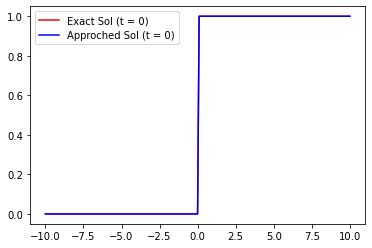

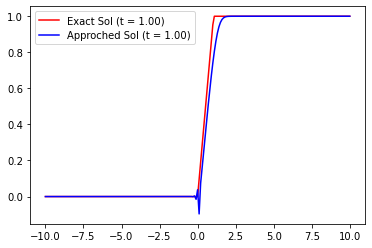

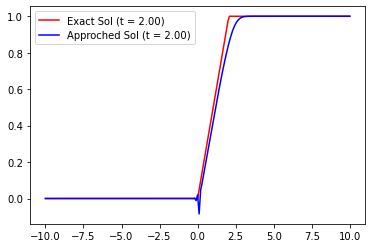

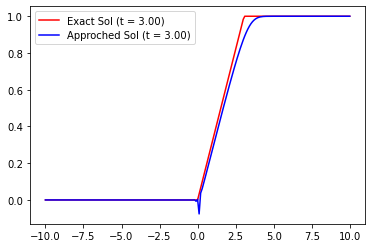

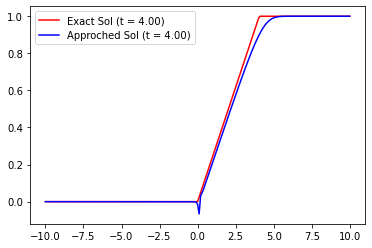

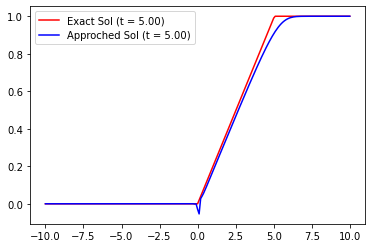

In [10]:
u=np.zeros(N+1)
for i in range(N+1):
    u[i]=u0(X[i])
    
NU=Nu(u)

C=M+dt*NU
B=np.linalg.inv(C)
    
# Tracé de la condition initiale
plt.plot(X,u,'-r',label='Exact Sol (t = 0)')
plt.plot(X,u,'-b',label='Approched Sol (t = 0)')
plt.legend()
plt.pause(0.1)


temps=0
unew=np.zeros(N)


# Boucle principale en temps


u=np.zeros(N)
for i in range(N):
    u[i]=u0(X[i])
  


E=np.zeros(101)

TT=np.linspace(0,T,101)


j=0
while temps<T:
    temps+=dt
    Uexact=np.zeros(N+1)
    for i in range(N+1):
        Uexact[i]=uex(temps,X[i])
    
    
    
    unew= B @ M @ u
    v = unew.copy()
    v=np.insert(v,0,0)
    
    NU=Nu(v)
    
    C=M+dt*NU
    B=np.linalg.inv(C)
    
    if  j % 20 == 0 and j!=0:
        
        plt.plot(X, Uexact, '-r', label='Exact Sol (t = {:.2f})'.format(temps-dt))
        plt.plot(X, v, '-b', label='Approched Sol (t = {:.2f})'.format(temps-dt))
        # plt.axis([0,1000,0,11])
        plt.legend()
        plt.pause(0.1)
        
        
    

    
    # Incrémentation du temps et mise à jour du tableau u    
    
    u = unew.copy()
    
    
    
    
    # Courbes de u au cours du temps    
    
    e=linalg.norm(np.sqrt(h)*(Uexact-v))
    E[j]=e
    
    j+=1
        
        
        

Text(0.5, 1.0, 'Error in case of dt=0.05 and dx=0.1')

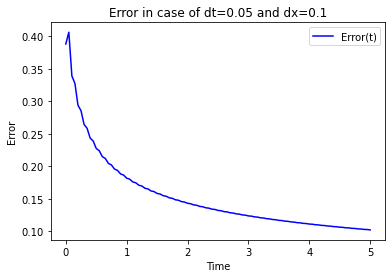

In [11]:
plt.plot(TT,E,'-b',label="Error(t)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Error in case of dt=0.05 and dx=0.1')

# Test 2

In [12]:
N=500
h=20/(N-1)

dt=0.01
T=5
X=np.linspace(-10,10,N+1)


def uex(t,x):
    if x<0:
        return 0
    elif x>=0 and x<=t:
        return x/t
    else: return 1




d=4*np.ones(N-2)
d=np.append(d,2)
d=np.insert(d,0,2)

d2=np.ones(N-1)
A1=np.diag(d2,1)
A2=np.diag(d2,-1)
A3=np.diag(d)

M=h/6*(A1+A2+A3)

def Nu(u):
    s=np.zeros(N)
    for i in range(N-1):
        s[i]=u[i]-u[i+2]

    s[N-1]=2*u[N]+u[N-1]
    
    
    s2=np.zeros(N-1)
    for i in range(N-1):
        s2[i]=2*u[i+1]+u[i+2]
        
        
    s3=np.zeros(N-1)
    for i in range(N-1):
        s3[i]=-2*u[i+2]-u[i+1]
    
    
    B1=np.diag(s2,1)
    B2=np.diag(s3,-1)
    B3=np.diag(s)
    
    NU=1/6*(B1+B2+B3)
    return NU   

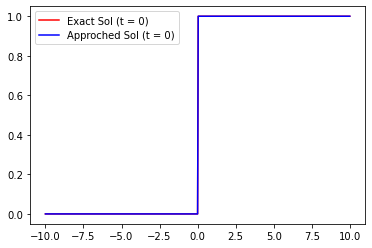

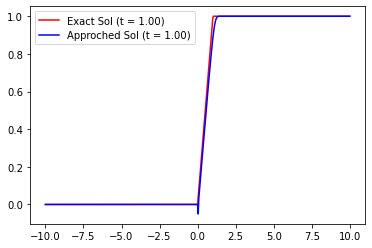

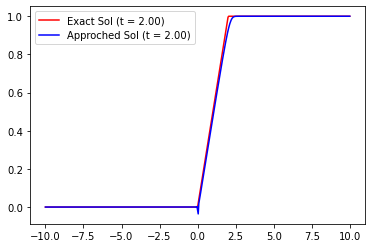

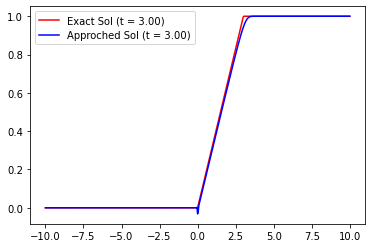

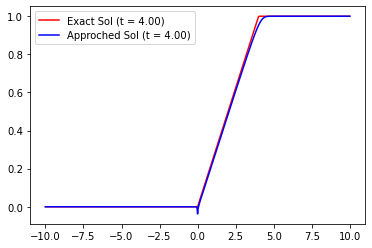

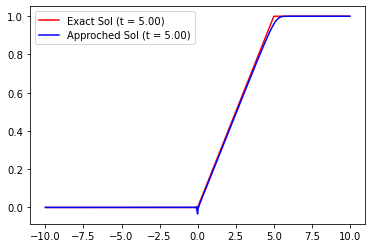

In [13]:
u=np.zeros(N+1)
for i in range(N+1):
    u[i]=u0(X[i])
    
NU=Nu(u)

C=M+dt*NU
B=np.linalg.inv(C)
    
# Tracé de la condition initiale
plt.plot(X,u,'-r',label='Exact Sol (t = 0)')
plt.plot(X,u,'-b',label='Approched Sol (t = 0)')
plt.legend()
plt.pause(0.1)


temps=0
unew=np.zeros(N)


# Boucle principale en temps


u=np.zeros(N)
for i in range(N):
    u[i]=u0(X[i])
  


E=np.zeros(501)

TT=np.linspace(0,T,501)


j=0
while temps<T:
    temps+=dt
    Uexact=np.zeros(N+1)
    for i in range(N+1):
        Uexact[i]=uex(temps,X[i])
    
    
    
    unew= B @ M @ u
    v = unew.copy()
    v=np.insert(v,0,0)
    
    NU=Nu(v)
    
    C=M+dt*NU
    B=np.linalg.inv(C)
    
    if  j % 100 == 0 and j!=0:
        
        plt.plot(X, Uexact, '-r', label='Exact Sol (t = {:.2f})'.format(temps-dt))
        plt.plot(X, v, '-b', label='Approched Sol (t = {:.2f})'.format(temps-dt))
        # plt.axis([0,1000,0,11])
        plt.legend()
        plt.pause(0.1)
        
        
    

    
    # Incrémentation du temps et mise à jour du tableau u    
    
    u = unew.copy()
    
    
    
    
    # Courbes de u au cours du temps    
    
    e=linalg.norm(np.sqrt(h)*(Uexact-v))
    E[j]=e
    
    j+=1
        
        
        

Text(0.5, 1.0, 'Error in case of dt=0.01 and dx=0.04')

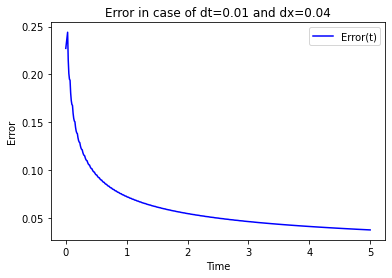

In [14]:
plt.plot(TT,E,'-b',label="Error(t)")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Error in case of dt=0.01 and dx=0.04')